## Lab #11 k Nearest Neighbor and Parzen Window

In [1]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

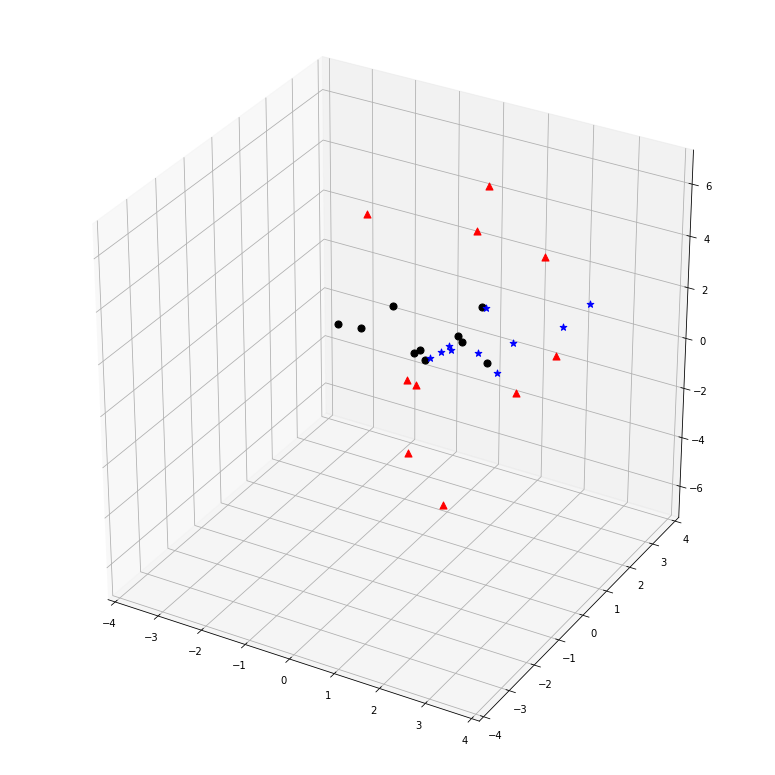

In [2]:
fig = plt.figure(figsize=(14,14))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# Plot Points

# samples 
X1 = np.array([[0.28,  1.31,  -6.2],
             [0.07  ,0.58  ,-0.78],
             [1.54  ,2.01  ,-1.63],
            [-0.44  ,1.18  ,-4.32],
            [-0.81  ,0.21  , 5.73],
             [1.52  ,3.16  , 2.77],
             [2.20  ,2.42  ,-0.19],
             [0.91  ,1.94  , 6.21],
             [0.65  ,1.93  , 4.38],
           [ -0.26  ,0.82  ,-0.96]])

X2=np.array([[0.011 , 1.03  ,-0.21],
            [ 1.27 , 1.28  , 0.08],
            [ 0.13 , 3.12  , 0.16],
            [-0.21 , 1.23  ,-0.11],
            [-2.18 , 1.39  ,-0.19],
            [ 0.34 , 1.96  ,-0.16],
            [-1.38 , 0.94  , 0.45],
            [-0.12 , 0.82  , 0.17],
            [-1.44 , 2.31  , 0.14],
            [ 0.26 , 1.94  , 0.08]])

X3=np.array([[ 1.36 , 2.17 , 0.14],
             [1.41 , 1.45 ,-0.38],
             [1.22 , 0.99 , 0.69],
             [2.46 , 2.19 , 1.31],
             [0.68 , 0.79 , 0.87],
             [2.51 , 3.22 , 1.35],
             [0.60 , 2.44 , 0.92],
             [0.64 , 0.13 , 0.97],
             [0.85 , 0.58 , 0.99],
             [0.66 , 0.51 , 0.88]])

for row in X1:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X2:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

for row in X3:
    ax.scatter(row[0], row[1], row[2], color="b", s=50, marker='*')

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-7, 7)

plt.show()

In [3]:
X = np.zeros((10,3,3))
X[:,:,0] = X1
X[:,:,1] = X2
X[:,:,2] = X3

In [42]:
test = np.zeros((3, 3))
test[:,0] = np.array([0.33, 0.58, -4.8])
test[:,1] = np.array([0.27, 1.0, -2.68])
test[:,2] = np.array([-0.44, 2.8, 6.2])

In [43]:
dist = np.linalg.norm(X - test[:,0][:, np.newaxis], axis=1)
dist

array([[ 1.57968351,  4.62302509,  5.29080334],
       [ 4.02839919,  5.01876479,  4.63246155],
       [ 3.68210538,  5.57612769,  5.57676429],
       [ 1.08779594,  4.76552201,  6.66791572],
       [10.59799038,  5.31114865,  5.68467237],
       [ 8.08562923,  4.84087802,  7.03878541],
       [ 5.30420588,  5.53319076,  6.02087203],
       [11.10882982,  4.99609848,  5.79581746],
       [ 9.2842501 ,  5.52534162,  5.81330371],
       [ 3.89246708,  5.06644846,  5.69000879]])

In [39]:
def KNN(dist, k):
    dist_sort = sorted(dist.flatten())
    num_class = np.sum(dist<=dist_sort[k-1],axis=0)
    return np.argmax(num_class)+1

In [45]:
k = 3
for i in range(3):
    dist = np.linalg.norm(X - test[:,i][:, np.newaxis], axis=1)
    predict = KNN(dist,k)
    print(str(test[:,i]) + " belongs to class " + str(predict))

[ 0.33  0.58 -4.8 ] belongs to class 1
[ 0.27  1.   -2.68] belongs to class 1
[-0.44  2.8   6.2 ] belongs to class 1


In [46]:
k = 11
for i in range(3):
    dist = np.linalg.norm(X - test[:,i][:, np.newaxis], axis=1)
    predict = KNN(dist,k)
    print(str(test[:,i]) + " belongs to class " + str(predict))

[ 0.33  0.58 -4.8 ] belongs to class 1
[ 0.27  1.   -2.68] belongs to class 2
[-0.44  2.8   6.2 ] belongs to class 3
